
# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 


### Question(s) for Analysis

<li>1)Which Movie has (higher/lower)budget?</li> 
<li>2)Which Movie has (higher /lower )revenue ?</li> 
<li>3)Which Movie has (higher /lower )vote average? </li>  
<li>4)Which Movies have better vote Calssic or Modern ?</li> 
<li>5)How much the number of movie production changed over the years?</li> 
<li>6)What are the most common genres ?</li> 
<li>7)What is the most prefered run time ?</li>
<li>8)What is the Best Month to releas a movie ?</li>

## Import Libiraries  

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html



#### The Functions which are going to be used to prevent repeted codes. 

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

def column_analysis(column_name):
    #get minemum value in certain column
    low=df[column_name].idxmin()
    #get data of low 
    low_row_data=pd.DataFrame(df.loc[low])
    
    #get minemum value in certain column
    high=df[column_name].idxmax()
    #get data of low 
    high_row_data=pd.DataFrame(df.loc[high])
    all_data=pd.concat([high_row_data,low_row_data],axis=1)
    return all_data
def vote_analysis(column_name):
    #get median of budget 
    
    column_median=df[column_name].median()
    #filter lower than median 
    low=df.query("`column_name` <= @column_median")
    #filter hiegher than median 
    high=df.query("`column_name` > @column_median")
    #check if all sample incuded in analysis
    #get number of rows
    num_sample=df.shape[0]
    #copmare number of rows with sum of to groups
    num_sample == low['vote_average'].count() + high['vote_average'].count()
    #get mean of vote_average for low budget 
    low_mean =low['vote_average'].mean()
    #get mean of vote_average for high budget
    high_mean =high['vote_average'].mean()
    #check if low budget or high budget affect on vote_avrage
    if low > high:
        print ("the movie with lower @column_name has vote average more than movie with higher @column_name ")
    elif low < high:
        print ("the movie with higher @column_name has vote average more than movie with lower @column_name ")
    else:
        print("the @column_name doesn't affect on the vote_average ")

<a id='wrangling'></a>
## Data Wrangling

> In this section data will be loaded, Assess and Clean to make it ready for investigations 


## Load Data

In [8]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv"
df=pd.read_csv(url)

### Assessing data
>in this part of code we will assessing the data to know exactly which columns are important for the investigation 

### print Head

In [9]:
#set option to see all columns of data 
pd.set_option('display.max_columns',None)
#print few rows of our data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Print Info

In [10]:
#view data type for each cell and missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### Get Data Shape

In [11]:
#show the shape of our original datafram
df.shape

(10866, 21)

#### check duplicates rows in data

In [12]:
#number of duplicated rows in our data 
df.duplicated().sum()

1

#### check count of null values in each column

In [13]:
#count of null value 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### make some statistics for data

In [14]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Note that:
There are some columns have been analyzed althogh it shoudn't, like "id" whice is integer in the Data set and we should change it to string ,also we have 0 values in "run time","budget","revenue" should elemenated.

### Assessing discussion
 After assessing the data set we found that:
<li>1)Extra column not needed in our investigation.</li> 
<li>2)Dublicated rows actully its one row. </li> 
<li>3)Null and zero values. </li>  
<li>4)Invalid values like "runtime =0" and also out of logic range "runtime =900".</li> 


### Data Cleaning
> In this part The Data will be cleaned to insure that the Data are ready for analysis.
 

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


**1-Remove exrta columns:** 

In [15]:
#drop list of  extraneos columns
#list of erxrtaneos columns 
extra_columns=['imdb_id','homepage','tagline','keywords','production_companies','budget_adj','revenue_adj']
df.drop(columns=extra_columns,inplace=True)
#check columns after drop
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
overview          10862 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


Droped extra columns will not used in investigation

**2-Drop Duplicats rows**

In [17]:
#delet duplicated rows
df.drop_duplicates(inplace=True)
#check if there are any other duplicated 
df.duplicated().sum()

0

drop dubliacte rows and check the data has no other duplicates

**3-Fill zero value with null**
>will apply this for "budget" and "revenue" only,and for "runtime" will fill it with avrage  

In [18]:
#creat list for coulmmns will fill with null
zero_list=['budget','revenue']
#fill null for the list created
df[zero_list]=df[zero_list].replace(0,np.nan)
#check
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,10865.000000,5.169000e+03,4.849000e+03,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,3.073958e+07,8.923886e+07,102.071790,217.399632,5.975012,2001.321859
std,92134.091971,1.000231,3.890441e+07,1.620801e+08,31.382701,575.644627,0.935138,12.813260
min,5.000000,0.000065,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.207575,6.000000e+06,7.732325e+06,90.000000,17.000000,5.400000,1995.000000
50%,20662.000000,0.383831,1.700000e+07,3.185308e+07,99.000000,38.000000,6.000000,2006.000000
75%,75612.000000,0.713857,4.000000e+07,9.996575e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


All zeros converted to null because we couldn't estimated it, will be  removed later.

**Fill runtime coulmn with mean** 

In [19]:
#get mean of runtime 
runtime_mean=df.runtime.mean()
runtime_median=df.runtime.median()
#replace 0valu with mean 
df["runtime"]=df['runtime'].replace(0,runtime_mean)
#after eleminate zeros will set all movies less than median to the mean runtime  
df['runtime']=df['runtime'].apply(lambda runtime_value :runtime_mean if runtime_value <=runtime_median  else runtime_value);
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,10865.000000,5.169000e+03,4.849000e+03,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,3.073958e+07,8.923886e+07,110.499766,217.399632,5.975012,2001.321859
std,92134.091971,1.000231,3.890441e+07,1.620801e+08,24.681440,575.644627,0.935138,12.813260
min,5.000000,0.000065,1.000000e+00,2.000000e+00,100.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.207575,6.000000e+06,7.732325e+06,102.071790,17.000000,5.400000,1995.000000
50%,20662.000000,0.383831,1.700000e+07,3.185308e+07,102.071790,38.000000,6.000000,2006.000000
75%,75612.000000,0.713857,4.000000e+07,9.996575e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


After filling run time zero value with the mean we found another value doesn't make sense will fill it with the median.

**4-Drop all null**

In [21]:
#drop all null value 
df.dropna(axis=0,inplace=True)

df.shape

(3849, 14)

In [22]:
df.dtypes

id                  int64
popularity        float64
budget            float64
revenue           float64
original_title     object
cast               object
director           object
overview           object
runtime           float64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
dtype: object

will change "id" to string to prevent any calcualtion on the column ,aslo 'budget'and "revenue" to intger and "releasedate" to dateobject.

In [23]:
#convert id to str 
df.id=df.id.astype(str)
#conert budget and revenue to int use another way
#creat list of coulum will convert
int_convert_list=['budget','revenue']
#apply change using 
df[int_convert_list]=df[int_convert_list].applymap(np.int64) 
#change releas date to date object
df.release_date=pd.to_datetime(df.release_date)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 14 columns):
id                3849 non-null object
popularity        3849 non-null float64
budget            3849 non-null int64
revenue           3849 non-null int64
original_title    3849 non-null object
cast              3849 non-null object
director          3849 non-null object
overview          3849 non-null object
runtime           3849 non-null float64
genres            3849 non-null object
release_date      3849 non-null datetime64[ns]
vote_count        3849 non-null int64
vote_average      3849 non-null float64
release_year      3849 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 451.1+ KB


**Add profit column**
> To add profit column will get the difrence between revenue and budget

In [26]:
#insert profit column
df.insert(4,'profit',df['revenue']-df['budget'])
#check 
df.head()

,id,popularity,budget,revenue,profit,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which Movie has (higher/lower) budget?)

In [28]:
#use column analysis funtion (user function)
column_analysis("budget")

,2244,2618
id,46528,39964
popularity,0.25054,0.090186
budget,425000000,1
revenue,11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
overview,An Asian assassin (Dong-gun Jang) is forced to...,A comedy about finding your true love at any p...
runtime,100,102.072


The Warrior's Way for "Sngmoo Lee" has maximum budget 425,000,000 US daollars with rate "6.4" , and Lost & Found for "Jeff Pollack" has minmum budget 1 dollar, (doesn't make sense).

### Research Question 2  (Which Movie has (higher /lower )Revenue?)

In [29]:
column_analysis("revenue")

,1386,5067
id,19995,13537
popularity,9.43277,0.462609
budget,237000000,6000000
revenue,2781505847,2
profit,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
overview,"In the 22nd century, a paraplegic Marine is di...",Fact-based 2003 drama about the young journali...
runtime,162,102.072


Avatar has the highest revenue 2,781,505,847 US dollars 
and Shattered Glass has lowest.

### Research Question3  (Which Movie has (higher /lower )vote average?)

In [30]:
column_analysis("vote_average")

,4178,4859
id,278,116977
popularity,7.19204,0.111351
budget,25000000,65000000
revenue,28341469,73706
profit,3341469,-64926294
original_title,The Shawshank Redemption,Foodfight!
cast,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...
director,Frank Darabont,Lawrence Kasanoff
overview,Framed in the 1940s for the double murder of h...,"Dex, a superdog sleuth, is the law of the land..."
runtime,142,102.072


The Shawshank Redemption has the highst rateing in all data "8.4" and Foodfight!has the lowest  "2.2".

### Research Question 4 (Which Movies have better vote Calssic or Modern?)

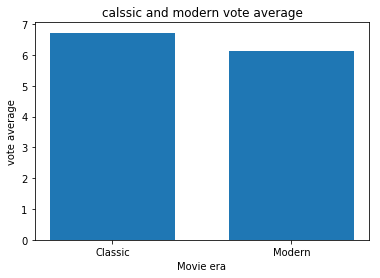

In [31]:
#slpit data frame to modern and classic
classic_movie=df.query("release_year<1980")
modern_movie=df.query("release_year>=1980")
#get mean of avrage of votes per each movie 
classic_mean=classic_movie['vote_average'].mean()
modern_mean=modern_movie['vote_average'].mean()
#visualise the data in bars 
#set variabe of the function 
hights=[classic_mean,modern_mean]
locations=[1,2]
labels=['Classic','Modern']
plt.bar(locations,hights,tick_label=labels,width=.7)
plt.title("calssic and modern vote average")
plt.ylabel("vote average")
plt.xlabel("Movie era");


The classic movies have higher rating more than modern movie.

### Research Question 5 (How much the number of movie production changed over the years?)

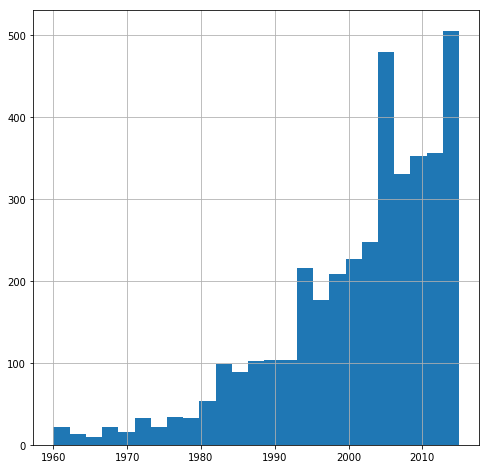

In [32]:
#sort years in our data 
years=np.sort(df.release_year.unique())
#visualise in histogram
df.release_year.hist(bins=25,figsize=(8,8));

we coulde see that our distrebution is left skwed that indecate to number of movies production has raised over the years.

### Research Question 6 (What are the most common genres?)

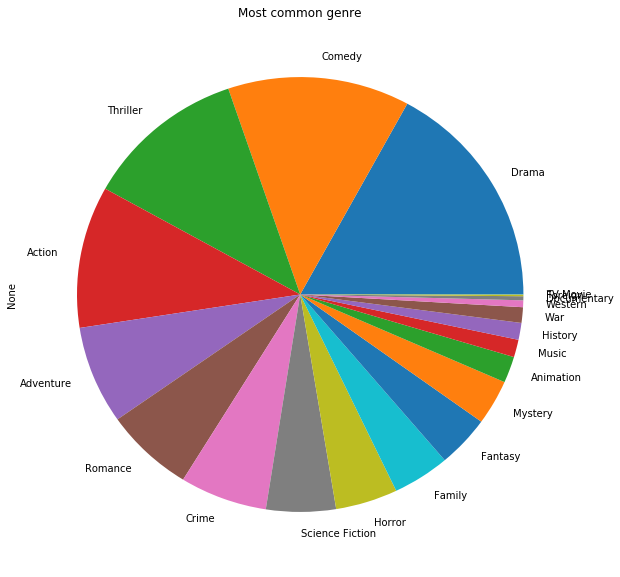

In [33]:
#genres coulunm come in strig so frist need to seperat them 
genres_type=df.genres.str.cat(sep="|")
genres_type=pd.Series(genres_type.split("|"))
genres_count=genres_type.value_counts()
genres_count.plot(kind="pie",title='Most common genre',figsize=(10,10));


the gragh show that the drama come in first then comedy and thriller and action take th fourth class in data and tv_movie documentry western come in the tail of our data.

### Research Question 7 (What is the most prefered run time?)

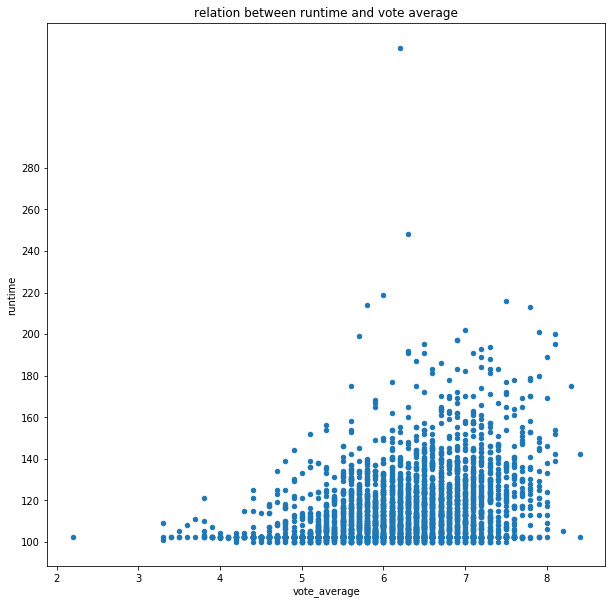

In [34]:
#draw relation betweeen run time and vote average of the movie 
df.plot( x='vote_average',y='runtime',
        kind='scatter',
        figsize=(10,10),
        yticks=np.arange(100,300,20),
        title=('relation between runtime and vote average'),);


The high voted movie duration between 120:140 min.

### Research Question 8 (What is the Best Month to releas a movie ?)

,count,mean,std,min,25%,50%,75%,max
release_date,,,,,,,,
1,225.0,3.051471e+07,6.894559e+07,-75171919.0,-3019662.00,6836616.0,4.813422e+07,5.204000e+08
2,257.0,4.056733e+07,8.040152e+07,-69590483.0,-3498345.00,12896728.0,6.305535e+07,5.818994e+08
3,279.0,6.559951e+07,1.301875e+08,-111007242.0,-307952.50,20470529.0,6.722814e+07,8.254671e+08
4,266.0,5.997196e+07,1.686881e+08,-119180039.0,-1291573.25,13856622.0,5.918646e+07,1.316249e+09
5,291.0,1.187381e+08,1.831426e+08,-74010360.0,301405.00,28710000.0,1.741881e+08,8.093176e+08
6,340.0,1.266208e+08,2.040851e+08,-64926294.0,7698527.50,46549842.5,1.591401e+08,1.363529e+09
7,314.0,9.404407e+07,1.661825e+08,-165710090.0,2124668.75,35944913.0,1.075775e+08,1.202818e+09
8,337.0,4.074104e+07,7.796095e+07,-98301101.0,-2447396.00,16231658.0,5.918816e+07,6.328063e+08
9,459.0,2.941643e+07,7.452264e+07,-60939944.0,-5985376.00,3124130.0,3.326111e+07,6.113927e+08


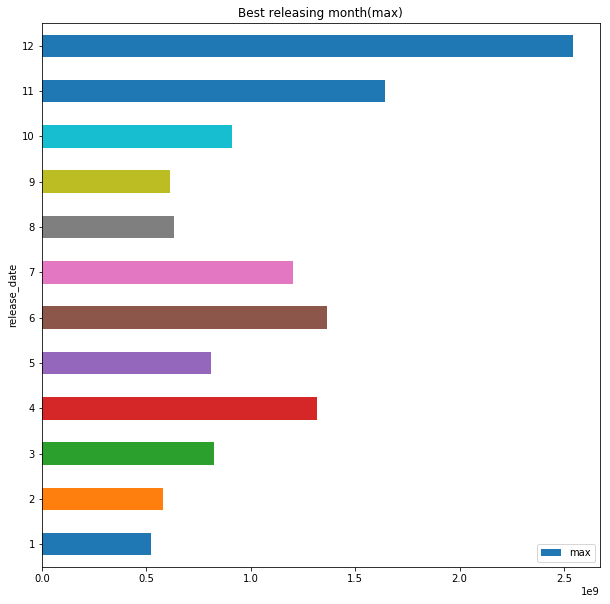

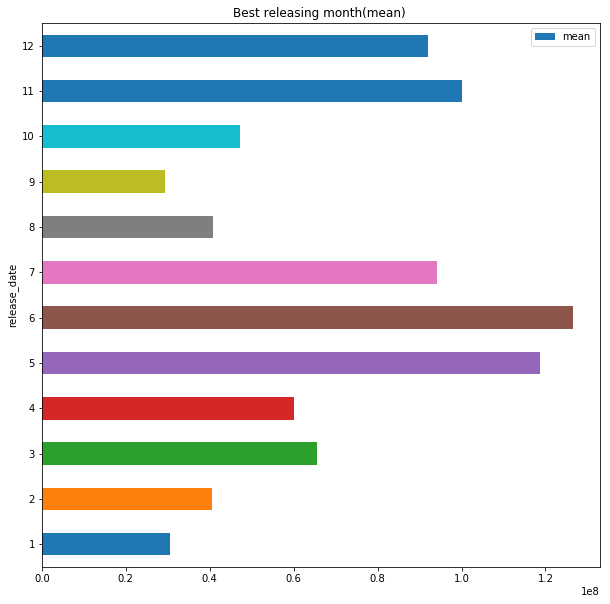

In [35]:
#group the releasing month and the profit 
g_month_profit_df=df.groupby(df.release_date.dt.month)['profit'].describe()
#draw relation between max profits and releasing month 
g_month_profit_df.plot(y='max',kind="barh",
                       figsize=(10,10),
                       title=('Best releasing month(max)'),)
#draw relation between mean profit and releasing month
g_month_profit_df.plot(y='mean',kind="barh",
                       figsize=(10,10),
                       title=('Best releasing month(mean) '),)
#show describtion 
g_month_profit_df

max profits is for "Nov&Dec" but i coulde take the result with mean it less risk , so "May&jun" is best month to releas movie.

<a id='conclusions'></a>
## Conclusions
>We can see that pepole prefered calssic movies more than modern movies, and the Movie with the maximum budget is "The Warrior's Way" for"Sngmoo Lee" had "6.4" vote_average and didn't make high reveneu compare to "avater" for "James Cameron" with vote_average "7.1" that made the highest revenu 2,781,505,847 US dollars, alos The Shawshank Redemption got the highest rate ever.

>We coulde imagine that the movie with highest budget hs the higher vote_average but it's not True, We can see that the average low budget Movies has higher rating more than high budget Movies.

>By calculating the movie released over the years we found that the number of movie production raised year after year and that's indecate to the cinema industey is booming.

>By checking genres we found drama comes in first then comedy and thriller and action take the fourth class in data and tv_movie documentry western come in the tail of the dataset.

>After checking runtimes for all movie and vote_average from pepole , we can see that the prefaerd movies durations between 120:140 min.

>finally the movie released in June or May has profit higher than all other Months, and the worest month to releas a movie is September.


## limitations:
>one of the most important limitations that we had data doesn't make any sense some movie has very low budget,revenue or runtime.

>also alot of missing data (null or zero ) anyway we eleminate it, but it's more than 50% of the given data

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0